In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("MultipleLR.csv - MultipleLR.csv (1).csv")

In [4]:
df.head()

,73,80,75,152
0,93,88,93,185
1,89,91,90,180
2,96,98,100,196
3,73,66,70,142
4,53,46,55,101


In [5]:
df

,73,80,75,152
0,93,88,93,185
1,89,91,90,180
2,96,98,100,196
3,73,66,70,142
4,53,46,55,101
5,69,74,77,149
6,47,56,60,115
7,87,79,90,175
8,79,70,88,164
9,69,70,73,141


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   73      24 non-null     int64
 1   80      24 non-null     int64
 2   75      24 non-null     int64
 3   152     24 non-null     int64
dtypes: int64(4)
memory usage: 900.0 bytes


In [7]:
df.drop_duplicates(inplace=True)

<Axes: >

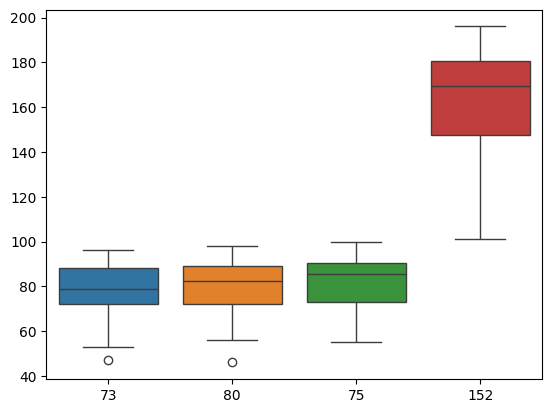

In [8]:
sns.boxplot(df)

<Axes: ylabel='73_log'>

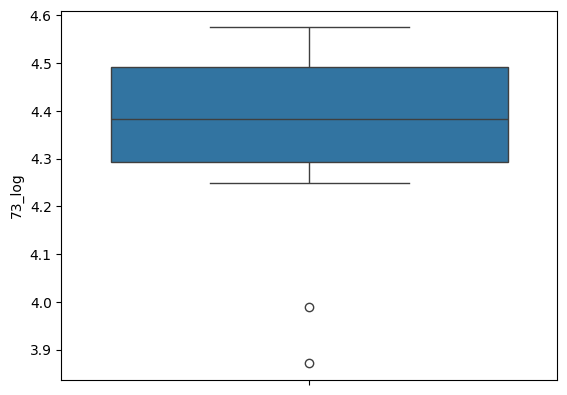

In [9]:
df["73_log"]=np.log1p(df["73"])
sns.boxplot(df["73_log"])

<Axes: ylabel='73_sqrt'>

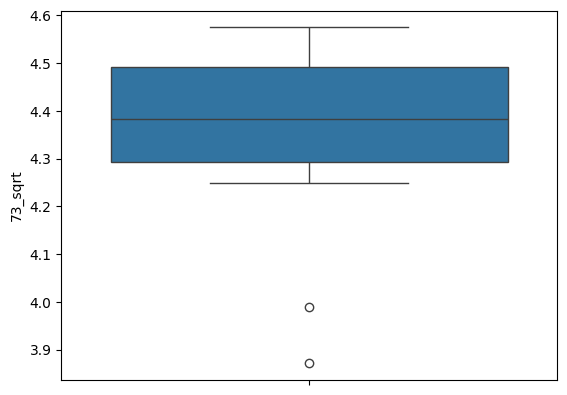

In [10]:
df["73_sqrt"]=np.log1p(df["73"])
sns.boxplot(df["73_sqrt"])

<Axes: ylabel='80_log'>

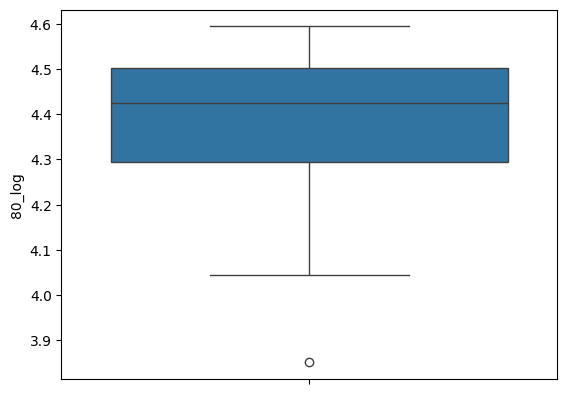

In [12]:
df["80_log"]=np.log1p(df["80"])
sns.boxplot(df["80_log"])

<Axes: ylabel='80_sqrt'>

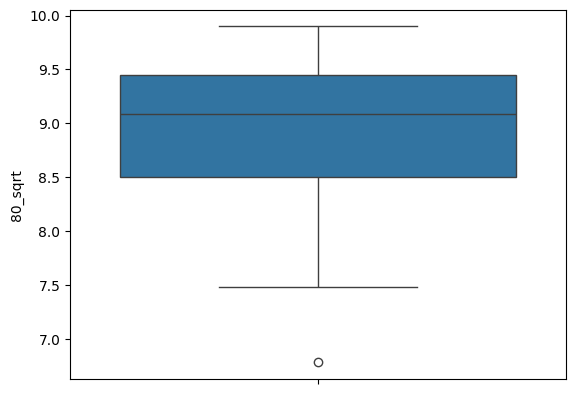

In [13]:
df["80_sqrt"]=np.sqrt(df["80"])
sns.boxplot(df["80_sqrt"])

In [14]:
df.head()

,73,80,75,152,73_log,73_sqrt,80_log,80_sqrt
0,93,88,93,185,4.543295,4.543295,4.488636,9.380832
1,89,91,90,180,4.499810,4.499810,4.521789,9.539392
2,96,98,100,196,4.574711,4.574711,4.595120,9.899495
3,73,66,70,142,4.304065,4.304065,4.204693,8.124038
4,53,46,55,101,3.988984,3.988984,3.850148,6.782330


In [15]:
df.drop(columns=["73_log","73_sqrt","80_log","80_sqrt"],inplace=True)

In [16]:
df.head()

,73,80,75,152
0,93,88,93,185
1,89,91,90,180
2,96,98,100,196
3,73,66,70,142
4,53,46,55,101


In [18]:
x=df.drop("152",axis=1)
y=df["152"]

In [19]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_tain,y_test=train_test_split(
    x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [21]:
from linear_regression2 import Linear_regression
model=Linear_regression()
model.fit(x_train_scaled,y_tain)

In [22]:
from sklearn.metrics import mean_absolute_error
ypred=model.predict(x_test_scaled)
mean_absolute_error(ypred,y_test)

688.8503925057698